## **Analyzing the Iris dataset using Python**

### Import Python packages:

In [84]:

# packages will be updated according to the task progression.

import csv
# for dataframes 
import pandas as pd
# machine Learning Library that contains datasets.
import sklearn as skl 
# plotting library
import matplotlib.pyplot as plt



### Output a summary of each Iris dataset variable to a single text file  


* Load dataset

In [85]:
# Load the iris dataset.
# using the file path as I already downloaded the IRIS dataset in csv format.
# the method is explained in Pandas documentation 
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#
# pandas.read_csv(filepath_or_buffer, *, sep=<no_default>, delimiter=None  )

* Import dataset previously downloaded

In [86]:
# as we already imported pd and downloaded the dataset, I went to the folder where the file is saved, and through properties I did copy the file path.
# assigning a value 
file_path = (r'C:\Users\marou\Desktop\pands\pands-project\iris dataset\iris.data')
# read the data
iris_data = pd.read_csv(file_path )

* Dataframe

In [87]:
# show dataframe
# dataset shape shows 5 columns with 149 rows. I can see that the target column (species) of the dataset is included, while the column names are not. 
# reference : https://archive.ics.uci.edu/dataset/53/iris
iris_data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [88]:
# add meaningful columns names
# https://archive.ics.uci.edu/dataset/53/iris ( see variables table )
column_names = ['sepal length in cm' , 'sepal width in cm' , 'petal length in cm' , 'petal width in cm', 'species']
iris_data = pd.read_csv(file_path, header= None, names=column_names)
# show data frame
iris_data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


* Summary of each Iris dataset variable to a single text file  

In [89]:
# summary of the 4 variables of Iris dataset.
# The describe() method returns description of the data in the dataframe. As the dataframe contains numerical data, the description contains these information for each column: 
# count, mean, std, min, 25%, 50%, 75%, max
# https://www.w3schools.com/python/pandas/ref_df_describe.asp#:~:text=The%20describe()%20method%20returns,The%20average%20(mean)%20value.   (see .describe() method )
iris_data.describe()


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [90]:
# I can also access separatly and output a summary of each variable of iris dataset
# examples :
# sepal length variable
sepal_length = iris_data['sepal length in cm']
# summary of sepal length 
sepal_length_summary = sepal_length.describe()
#show
sepal_length_summary



count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length in cm, dtype: float64

In [91]:
# create a variable ' summary ' to store the result of dataframe describe method. 
summary = iris_data.describe()
# save the iris dataset variables summary into a .txt 
summary.to_csv('summary_iris.txt' , ',',  header=True, index=True)

# showing the header in txt file by setting the parameter header to True, hiding the index by setting it to False
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html ( explore .read_csv() documentation )

C:\Users\marou\AppData\Local\Temp\ipykernel_14608\1200070863.py:4: FutureWarning: Starting with pandas version 3.0 all arguments of to_csv except for the argument 'path_or_buf' will be keyword-only.
  summary.to_csv('summary_iris.txt' , ',',  header=True, index=True)


### Saves a histogram of each variable to png files


In [92]:
# create a histogram for each iris dataset variable
# I need to access each columns of the iris dataset, columns correspond to the features names (variables)
# recal column names

column_names


['sepal length in cm',
 'sepal width in cm',
 'petal length in cm',
 'petal width in cm',
 'species']

In [100]:
# assign a variable for each feature of the data set, to simplify the reading

sepal_length    = iris_data['sepal length in cm']
sepal_width     = iris_data['sepal width in cm']
petal_length    = iris_data['petal length in cm']
petal_width     = iris_data['petal width in cm']

(array([48.,  2., 15., 37., 25., 23.]),
 array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5]),
 <BarContainer object of 6 artists>)

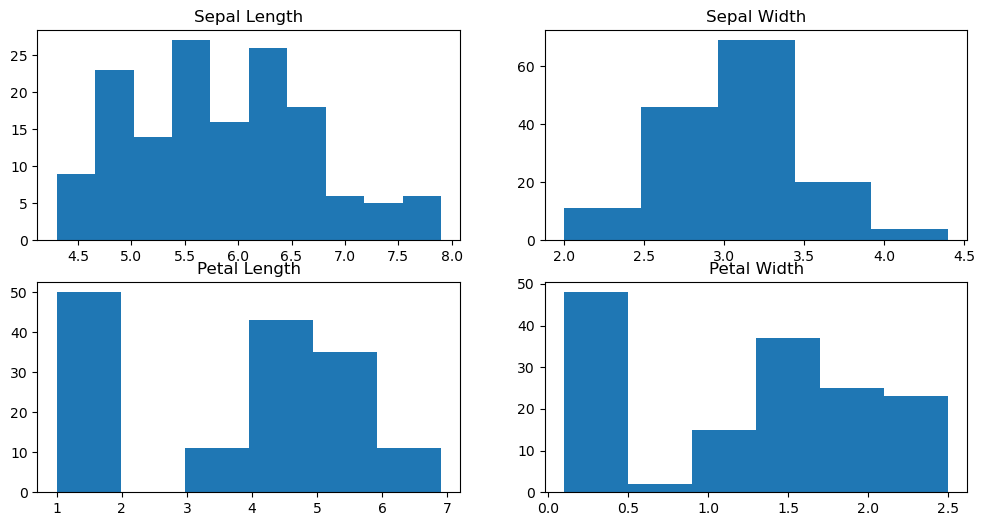

In [103]:
# create a figure and axis
# method used to display Multiple Plots
# reference : https://www.w3schools.com/Python/matplotlib_subplot.asp
# (2,2) the figure has 2 rows, 2 columns, and this plot is the 1st plot in 1st row.
fig, axes = plt.subplots(2, 2, figsize=(12,6))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(iris_data['sepal length in cm'])

# this plot is the 2nd plot in 1st row.

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(iris_data['sepal width in cm'], bins=5);

# this plot is the first plot in 2nd row.

axes[1,0].set_title("Petal Length")
axes[1,0].hist(iris_data['petal length in cm'], bins=6);

# this plot is the 2nd plot in 2nd row.

axes[1,1].set_title("Petal Width")
axes[1,1].hist(iris_data['petal width in cm'], bins=6)

In [104]:
# I still need to add more parameters to this grid of histograms : mainly adjust the layout, cusomize colors , suptitle etc.
# I also have to save histograms in png format, need to make sure of the lecturers' request if one histogram in each png, or save them individually.